In [80]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math as mt
import seaborn as sns
sns.set()
from scipy import stats
from scipy.stats import norm
from scipy.stats import binom
from sklearn import linear_model
from sklearn import preprocessing as ppr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import xgboost as xgb

In [32]:
def read_any_csv(data):
    csv_output = pd.read_csv(data)
    return csv_output

In [25]:
my_data = ("https://github.com/busgandy/10Acad/blob/master/Week%204/AdSmartABdata.csv")

In [28]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [29]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [30]:
downloaded = drive.CreateFile({'id':"1YSn01vvlHKQaAIBtwIXRNd-oTaTuDN09"}) 
downloaded.GetContentFile('ABAdRecall.csv')

In [33]:

data=('ABAdRecall.csv')
read_any_csv(data)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [35]:
variable_one = read_any_csv(data)

# Classic and sequential A/B testing analysis

## Data exploration to count unique values of categorical variables

In [36]:
variable_one.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [37]:
variable_one.tail()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0
8076,fffbb9ff-568a-41a5-a0c3-6866592f80d8,control,2020-07-10,14,Samsung SM-G960F,6,Facebook,0,0


In [38]:
def control_yes(variable_any):
    answer = variable_any.loc[variable_any['yes'] == 1].count()
    return answer

### Getting the Control Group Counts

In [39]:
#controls = variable_one.loc[variable_one["experiment"] == "control"].count
#controls
control_group = variable_one.groupby([variable_one["experiment"] == "control"])[['yes','no']].sum()
control_group

,yes,no
experiment,,
False,308,349
True,264,322


### This means that for the Control Experiment, 264 people clicked YES, while 322 people clicked NO

In [40]:
clicks_cont = 264+322
print("The total number of clicks for Control Users is:", clicks_cont)

The total number of clicks for Control Users is: 586


### Getting the Exposed Group Counts

In [41]:
exposed_group = variable_one.groupby([variable_one["experiment"] == "exposed"])[['yes','no']].sum()
exposed_group

,yes,no
experiment,,
False,264,322
True,308,349


### This means that for the Exposed Experiment, 308 clicked YES, while 349 clicked NO

In [42]:
clicks_exp = 308+349
print("The total number of clicks for Exposed Users is:", clicks_exp)

The total number of clicks for Exposed Users is: 657


In [43]:
clicks_total = clicks_cont + clicks_exp
print(f"Total Page view selection is {clicks_total}")

Total Page view selection is 1243


In [44]:
def yes_group_by_count(variable_any):
    answer = variable_any.loc[variable_any['yes'] == 1].count()
    return answer
def yes_group_by_counts(variable_any):
    answer = variable_any.loc[variable_any['yes'] >= 0].count()
    return answer
def no_group_by_count(variable_any):
    answer = variable_any.loc[variable_any['no'] == 1].count()
    return answer
def no_group_by_counts(variable_any):
    answer = variable_any.loc[variable_any['no'] >= 0].count()
    return answer
def no_group_by_count_zero(variable_any):
    answer = variable_any.loc[variable_any['no'] == 0].count()
    return answer
def yes_group_by_count_zero(variable_any):
    answer = variable_any.loc[variable_any['yes'] == 0].count()
    return answer
def total_by_count(variable_any):
    answer = yes_group_by_count(variable_any) + no_group_by_count(variable_any) + no_group_by_count_zero(variable_any) + yes_group_by_count_zero(variable_any)
    return answer

### Getting the NO Value Counts for the fields

In [45]:
no_group_by_counts(variable_one)

auction_id     8077
experiment     8077
date           8077
hour           8077
device_make    8077
platform_os    8077
browser        8077
yes            8077
no             8077
dtype: int64

### Getting the YES Value Counts for the fields

In [46]:
yes_group_by_counts(variable_one)

auction_id     8077
experiment     8077
date           8077
hour           8077
device_make    8077
platform_os    8077
browser        8077
yes            8077
no             8077
dtype: int64

In [47]:
total_by_count(variable_one)

auction_id     16154
experiment     16154
date           16154
hour           16154
device_make    16154
platform_os    16154
browser        16154
yes            16154
no             16154
dtype: int64

### Getting the YES Click Value Counts for the fields

In [48]:
yes_group_by_count(variable_one)

auction_id     572
experiment     572
date           572
hour           572
device_make    572
platform_os    572
browser        572
yes            572
no             572
dtype: int64

### Getting the NO Click Value Counts for the fields

In [49]:
no_group_by_count(variable_one)

auction_id     671
experiment     671
date           671
hour           671
device_make    671
platform_os    671
browser        671
yes            671
no             671
dtype: int64

### Getting the Conversion Rates on the Webpage per Total Visitors
#### Conversion Rate = The number of conversions on a webpage / the total number of visitors.

In [50]:
conversion_rate = (yes_group_by_count(variable_one) + no_group_by_count(variable_one))/ total_by_count(variable_one)
print("The conversion rate is: \n")
print(conversion_rate)

The conversion rate is: 

auction_id     0.076947
experiment     0.076947
date           0.076947
hour           0.076947
device_make    0.076947
platform_os    0.076947
browser        0.076947
yes            0.076947
no             0.076947
dtype: float64


#### The Probability of getting a YES

In [51]:
The_probability_of_getting_a_yes = 572/8077
print (f"The probability of getting a yes is: {The_probability_of_getting_a_yes}")

The probability of getting a yes is: 0.07081837315835088


#### The Probability of getting a NO

In [52]:
The_probability_of_getting_a_no = 671/8077
print (f"The probability of getting a no is: {The_probability_of_getting_a_no}")

The probability of getting a no is: 0.0830753992819116


This is also the number of confidence interval

In [53]:
def yes_group_by(variable_any):
    answer = variable_any.groupby('yes').count()
    return answer

def no_group_by(variable_any):
    answer = variable_any.groupby('no').count()
    return answer    

### Getting the value counts for the Bounce and Click values of YES

In [54]:
yes_group_by(variable_one)

,auction_id,experiment,date,hour,device_make,platform_os,browser,no
yes,,,,,,,,
0,7505,7505,7505,7505,7505,7505,7505,7505
1,572,572,572,572,572,572,572,572


### Getting the value counts for the Bounce and Click values of NO

In [55]:
no_group_by(variable_one)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes
no,,,,,,,,
0,7406,7406,7406,7406,7406,7406,7406,7406
1,671,671,671,671,671,671,671,671


### Grouping YES/NO with the Date

In [56]:
date_yes_and_no = variable_one[["date","yes","no"]]

In [57]:
yes_and_no_groupby = variable_one.groupby('date')[['yes','no']].sum()
yes_and_no_groupby.head(8)

,yes,no
date,,
2020-07-03,147,178
2020-07-04,76,83
2020-07-05,52,65
2020-07-06,35,39
2020-07-07,38,45
2020-07-08,85,92
2020-07-09,85,99
2020-07-10,54,70


In [58]:
variable_one['date'].value_counts()

2020-07-03    2015
2020-07-09    1208
2020-07-08    1198
2020-07-04     903
2020-07-10     893
2020-07-05     890
2020-07-06     490
2020-07-07     480
Name: date, dtype: int64

Text(0, 0.5, 'Frequency')

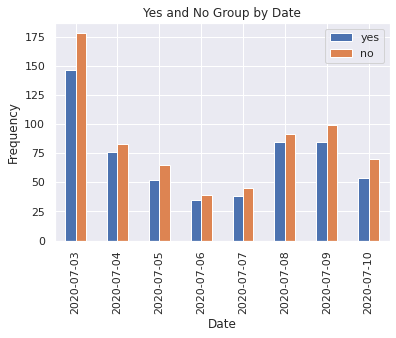

In [59]:
yes_and_no_groupby.plot(kind= "bar").set_title("Yes and No Group by Date")
plt.xlabel("Date")
plt.ylabel("Frequency")

In [60]:
experiment_group_by = variable_one.groupby('experiment')[['yes','no']].sum()
experiment_group_by.head()

,yes,no
experiment,,
control,264,322
exposed,308,349


In [61]:
variable_one['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

#### 4071 Users saw the Control Experiment, while 4006 saw the exposed experiment

Text(0, 0.5, 'Frequency')

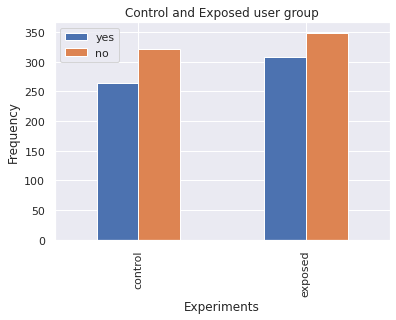

In [62]:
experiment_group_by.plot(kind= "bar").set_title("Control and Exposed user group")
plt.xlabel("Experiments")
plt.ylabel("Frequency")

This shows that showing the logo of SmartAd makes the users clicked more yes

This shows that the difference between the controlled and exposed experiment is not mmuch. Showing the SmartAd logo is insignificant

Increasing the number of N the Binomial Distribution will look like a Normal Distribution, which the approximationn of the mean could approach each other.

In [63]:
experiment_group_by_browser = variable_one.groupby('browser')[['yes','no']].sum()
experiment_group_by_browser.head()

,yes,no
browser,,
Android,0,0
Chrome,1,1
Chrome Mobile,314,381
Chrome Mobile WebView,116,111
Chrome Mobile iOS,1,0


In [64]:
variable_one['browser'].value_counts()

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Android                          1
Opera Mini                       1
Puffin                           1
Firefox Mobile                   1
Edge Mobile                      1
Name: browser, dtype: int64

Text(0, 0.5, 'Frequency')

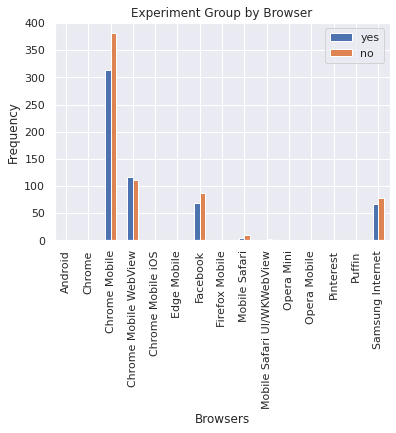

In [65]:
experiment_group_by_browser.plot(kind= "bar").set_title("Experiment Group by Browser")
plt.xlabel("Browsers")
plt.ylabel("Frequency")

In [66]:
experiment_group_by_device_make = variable_one.groupby('device_make')[['yes','no']].sum()
experiment_group_by_device_make.head()

,yes,no
device_make,,
5008Y_EEA,0,0
5099Y,0,0
6039Y,0,0
A0001,1,0
ALE-L21,0,0


In [67]:
experiment_group_by_hour = variable_one.groupby('hour')[['yes','no']].sum()
experiment_group_by_hour.head()

,yes,no
hour,,
0,16,15
1,12,20
2,12,21
3,16,28
4,22,24


In [68]:
variable_one['hour'].value_counts()

15    1895
8      394
7      381
9      346
10     336
16     335
6      327
14     319
5      302
13     290
11     282
4      281
12     278
18     273
3      266
20     264
17     263
2      230
19     227
1      222
21     206
0      194
22     135
23      31
Name: hour, dtype: int64

Text(0, 0.5, 'Frequency')

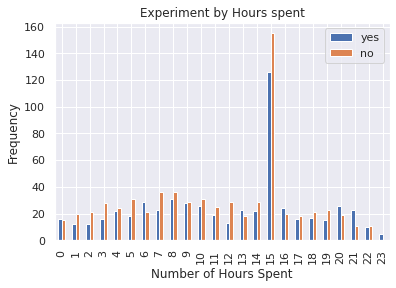

In [69]:
experiment_group_by_hour.plot(kind= "bar").set_title("Experiment by Hours spent")
plt.xlabel("Number of Hours Spent")
plt.ylabel("Frequency")

#### This shows that majority of the users who clicked the ads have spent 15 hours on the platform

In [70]:
variable_one['platform_os'].value_counts()

6    7648
5     428
7       1
Name: platform_os, dtype: int64

Text(0, 0.5, 'Frequency')

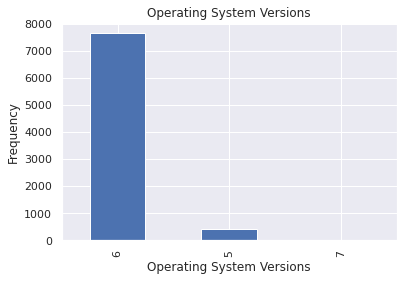

In [71]:
variable_one['platform_os'].value_counts().plot(kind='bar', title = 'Operating System Versions')
plt.xlabel("Operating System Versions")
plt.ylabel("Frequency")

#### This shows that majority (about 95%) of Users made use of the Operating System Version 6 to navigate the page and click the ad

#### Probability of getting a Click in Control Group:

In [72]:
Prob_Control_Group = clicks_cont/8077
print(Prob_Control_Group*100)

7.2551689983904915


#### Probability of getting a Click in Exposed Group:

In [73]:
Prob_Exposed_Group = clicks_exp/8077
print(Prob_Exposed_Group*100)

8.134208245635756


#### P_Control=7%
#### H0=7%
#### H_Alternative = P_Control > 7%
#### P_Value = P(P_Exposed >= 8% assuming H0 is True)
#### P_Value = 3/5 = 0.6

In [74]:
control_users = 4071
exposed_users = 4006
yes_control  = 264
yes_exposed = 308
p_control =  yes_control / control_users
p_exposed =  yes_exposed / exposed_users

In [75]:
con = 4071
exp = 4006
f_con, f_exp = 264, 308
p_con, p_exp = f_con / con, f_exp / exp

In [76]:
def get_pvalue(con_conv, test_conv, con_size, test_size):
    lift = -abs(test_conv - con_conv)
    
    scale_one = con_conv * (1-con_conv) * (1/ con_size)
    scale_two = test_conv * (1-test_conv) * (1/ test_size)
    scale_val = (scale_one + scale_two) ** 0.5
    
    p_value = 2 * stats.norm.cdf(lift, loc=0, scale = scale_val)  
    return p_value
get_pvalue(p_control,p_exposed,control_users,exposed_users)

0.03507081594570177

In [77]:
def statistical_power(n, p1, p2, cl):
    alpha = 1 - cl
    qu = stats.norm.ppf(1 - alpha/2)
    diff = abs(p2-p1)
    bp = (p1+p2) / 2
    
    v1 = p1 * (1-p1)
    v2 = p2 * (1-p2)
    bv = bp * (1-bp)
    
    power_part_one = stats.norm.cdf((n**0.5 * diff - qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    power_part_two = 1 - stats.norm.cdf((n**0.5 * diff + qu * (2 * bv)**0.5) / (v1+v2) ** 0.5)
    
    power = power_part_one + power_part_two
    
    return (power)
n = control_users + exposed_users
confidence_level = 0.95
statistical_power(n, p_control,p_exposed,confidence_level)

0.8463840204300261

This shows that at confidence level of (0.95=95%),and  the statistical power is 0.85 (85%), so, we reject the null hypothesis.
The brand awareness change increased for the exposed group

### The number of data points are not enough to make a reasonable judgment. 
### Increasing the number of N the Binomial Distribution will look like a Normal Distribution, which the approximationn of the mean would approach each other.

### The brand awareness changed increase for the exposed group. The difference is not so large.
### The A/B Analysis affects the decisions of the users

# 2.2 Machine Learning

#### Our problem is a YES/NO response to a questionnaire which predicts whether the campaign ad created by SmartAd company resulted in a significant lift in brand awareness or not. Our Dataset is splitted into two; Control and Exposed group. Our target variable is the yes response from users in the groups. 

### Training and Testing
#### Splitting the data into 70% training, 20% validation, and 10% test sets. 

In [78]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = ppr.LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = ppr.LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [81]:
ML_data = variable_one.drop(['auction_id','date'], axis=1)
ML_data['target'] = np.where(ML_data['yes'] == 1, 'Aware', (np.where(ML_data['no'] == 1, 'Not Aware', 'No Response')))

ML_data = MultiColumnLabelEncoder(columns = ['experiment','device_make','platform_os','browser','target']).fit_transform(ML_data)
# define the target variable (dependent variable) as y
y = ML_data.target 

ML_data = ML_data.drop(['yes','no','target'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(ML_data, y, test_size=0.1, random_state=0)
print(f" X-Train is: {X_train.shape}\n Y-Train is: {y_train.shape}\n X-Test is: {X_test.shape}\n Y-Test is: {y_test.shape}")

 X-Train is: (7269, 5)
 Y-Train is: (7269,)
 X-Test is: (808, 5)
 Y-Test is: (808,)


#### Train a machine learning model using 5-fold cross validation the following 3 different algorithms:
#### 1. Logistic Regression 
#### 2. Decision Trees
#### 3. XGBoost


##### 1. Logistic Regression

Accuracy of logistic regression classifier on test set: 0.8725247524752475


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0, 0.5, 'Predictions')

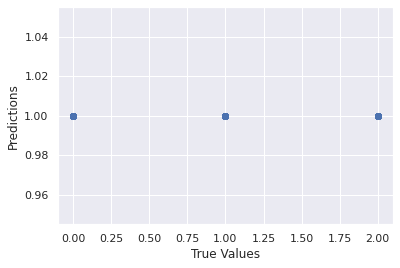

In [82]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg_model = logreg.fit(X_train, y_train)

logreg_y_pred = logreg.predict(X_test)
print(f'Accuracy of logistic regression classifier on test set: {(logreg.score(X_test, y_test))}')

#plotting the model
## The line / model
plt.scatter(y_test, logreg_y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

##### 5-fold cross validation

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross-validated scores: [0.84591584 0.84591584 0.84643963 0.84643963 0.84582043]


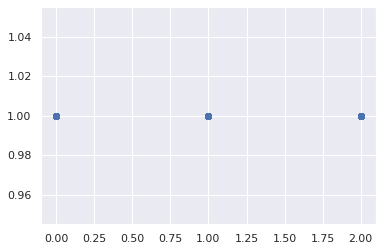

In [84]:
logreg_cv_scores = cross_val_score(logreg_model, ML_data, y, cv=5)

# Make cross validated predictions
logreg_cv_y_pred = cross_val_predict(logreg_model, ML_data, y, cv=6)
plt.scatter(y, logreg_cv_y_pred)
print('Cross-validated scores:', logreg_cv_scores)

#### 2.  Decision Tree

In [88]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

dt_y_pred = dt.predict(X_test)

awareness = np.array(y_test)
dt_predictions = np.array(dt_y_pred)
confusion_matrix(awareness, dt_predictions)

array([[  0,  49,   1],
       [ 26, 660,  19],
       [  3,  50,   0]])

Cross-validated scores: [0.80445545 0.7970297  0.80495356 0.78575851 0.80371517]


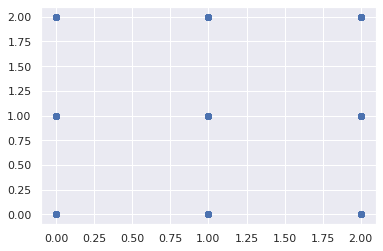

In [89]:
# Perform 5-fold cross validation
dt_cv_scores = cross_val_score(dt_model, ML_data, y, cv=5)
print('Cross-validated scores:', dt_cv_scores)

# Make cross validated predictions
dt_cv_y_pred = cross_val_predict(dt_model, ML_data, y, cv=6)
plt.scatter(y, dt_cv_y_pred)

In [90]:
pd.DataFrame(dt.feature_importances_.reshape(1, -1), columns=list(ML_data))

,experiment,hour,device_make,platform_os,browser
0,0.02425,0.436681,0.494897,0.000061,0.044112


#### 3.  XGBoost

In [91]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

xg_model = regressor.fit(X_train, y_train)

xg_y_pred = regressor.predict(X_test)

xg_mse = mean_squared_error(y_test, xg_y_pred)
xg_rmse = np.sqrt(xg_mse)

print('Mean Squared Error of XGBoost model is : ',xg_mse,'\nRoot Mean Squared Error of XGBoost model is : ', xg_rmse)

[15:39:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error of XGBoost model is :  0.12989727353506653 
Root Mean Squared Error of XGBoost model is :  0.3604126434173287


[15:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross-validated scores: [ 0.00024509 -0.03108185 -0.01230869 -0.01002037 -0.0014459 ]
[15:39:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:39:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:39:44] WARNING: /work

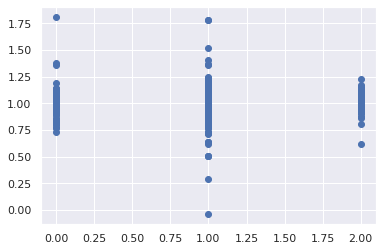

In [92]:
# Perform 5-fold cross validation
xg_cv_scores = cross_val_score(xg_model, ML_data, y, cv=5)
print('Cross-validated scores:', xg_cv_scores)

# Make cross validated predictions
xg_cv_y_pred = cross_val_predict(xg_model, ML_data, y, cv=6)
plt.scatter(y, xg_cv_y_pred)

In [93]:
pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=list(ML_data))

,experiment,hour,device_make,platform_os,browser
0,0.202763,0.195139,0.21396,0.169612,0.218525


In [94]:
!pip freeze > requirements.txt